# Ocena jakości wina

Michał Wójcik - 307396

Filip Olejniczak

Szymon Szafrański - 307405

## Wprowadzenie

TODO

## Poznanie i wstępne przeanalizowanie danych

In [1]:
# Załadowanie potrzebnych bibliotek
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Wczytanie zestawów danych
red_dataset = pd.read_csv('winequality-red.csv', sep=';')
white_dataset = pd.read_csv('winequality-white.csv', sep=';')

Ponieważ chcemy dokonać niezależnej analizy dwóch zbiorów danych, wspomożemy się funkcją, która pozwoli nam wywoływać każdą inną funkcję jednokrotnie, a które będzie wykonywała daną funkcję dla obydwu zestawów danych.

In [3]:
# Funkcja do równoległego wykonywania działań na dwóch zestawach danych
def call(func):
    print('Czerwone wino:')
    func(red_dataset)
    print('\n\nBiałe wino:')
    func(white_dataset)

Dwa zestawy danych, na których będziemy operować prezentują się następująco:

In [4]:
red_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Zaczniemy od wyświetlenia podstawowych informacji o zestawach danych.

In [6]:
def print_column_info(df):
    print(df.info())
    
call(print_column_info)

Czerwone wino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Białe wino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (tota

In [7]:
def print_description(df):
    print(df.describe())
    
call(print_description)

Czerwone wino:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.

In [8]:
def print_info(df):
    print('Liczba atrybutów:', df.shape[1])
    print('Liczba klas:', df.iloc[:,-1].unique().shape[0])
    print('Liczba obiektów:', df.shape[0])
    print('Liczba brakujących obiektów:', df.isnull().sum().sum())
    print('Liczba obiektów w klasach:')
    class_names = df.iloc[:,-1].unique()
    class_names.sort()
    for i in list(class_names):
        print(i, '-', df[df.iloc[:,-1] == i].shape[0])

call(print_info)

Czerwone wino:
Liczba atrybutów: 12
Liczba klas: 6
Liczba obiektów: 1599
Liczba brakujących obiektów: 0
Liczba obiektów w klasach:
3 - 10
4 - 53
5 - 681
6 - 638
7 - 199
8 - 18


Białe wino:
Liczba atrybutów: 12
Liczba klas: 7
Liczba obiektów: 4898
Liczba brakujących obiektów: 0
Liczba obiektów w klasach:
3 - 20
4 - 163
5 - 1457
6 - 2198
7 - 880
8 - 175
9 - 5


W opisie zestawów danych i podstawowych informacji o nich widzimy niepokającą sytuację: rozkład ilości obiektów w klasach wydaje się być bardzo nierówny. Potwierdzają to również kwartyle atrybutu jakości w obydwu zestawach danych: w obydwu przypadkach mają one tylko wartości 5 i 6, a przecież istnieją też obiekty o jakościach 3 i nawet 9. Postanowiliśmy więc narysować wykresy rozkładu atrybutu jakości.

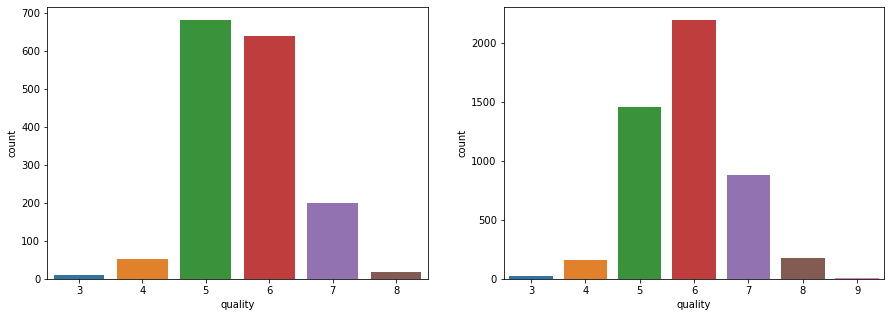

In [9]:
def show_quality_distribution(df):
    sns.countplot(x=df['quality'])
    
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
show_quality_distribution(red_dataset)
plt.subplot(1, 2, 2)
show_quality_distribution(white_dataset)

Jak widać nasze obawy były słuszne. W obydwu zestawach danych dominującymi wartościami sa 5 i 6, a obiektów o pozostałych jakościach jest o wiele mniej. Na przykład w przypadku wina białego obiektów o jakości 9 jest tylko 5. Z tego powodu utworzony model może bardzo niedokładnie przypisywać odpowiednie jakości winom lepszej i gorszej jakości. Postanowiliśmy więc górne i dolne jakości połączyć w jedne, dzieląc tym samym zestawy danych na jakości "bad", "medium" i "good" zamiast skali 0-10.

In [10]:
def group_qualities(df):
    bins = (0, 5, 6, 10)
    group_names = ['bad', 'medium', 'good']
    df['quality level'] = pd.cut(df['quality'], bins = bins, labels = group_names)
    print('Liczba obiektów w klasach:')
    for i in list(group_names):
        print(i, '-', df[df.iloc[:,-1] == i].shape[0])
    
call(group_qualities)

Czerwone wino:
Liczba obiektów w klasach:
bad - 744
medium - 638
good - 217


Białe wino:
Liczba obiektów w klasach:
bad - 1640
medium - 2198
good - 1060


Jak widzimy, udało nam się dzięki temu osiągnąć pożądany efekt - rozłożenie obiektów w poszczególnych klasach jakości jest teraz o wiele równiejsze.

Następnie zbadaliśmy zmienność każdego atrybutu w zależności klasy, w celu odkrycia, które atrybuty mogą być przydatne przy rozróżnianiu klasy jakości wina.

In [11]:
def show_attributes_values(df):
    df_tmp = df.drop(columns = ['quality'])
    atrybuty = list(df_tmp.columns)
    plt.figure(figsize = (15, 15))
    for index, attribute in enumerate(atrybuty[:-1]):
        plt.subplot(4, 3, index + 1)
        sns.violinplot(x='quality level', y=attribute, data=df_tmp)

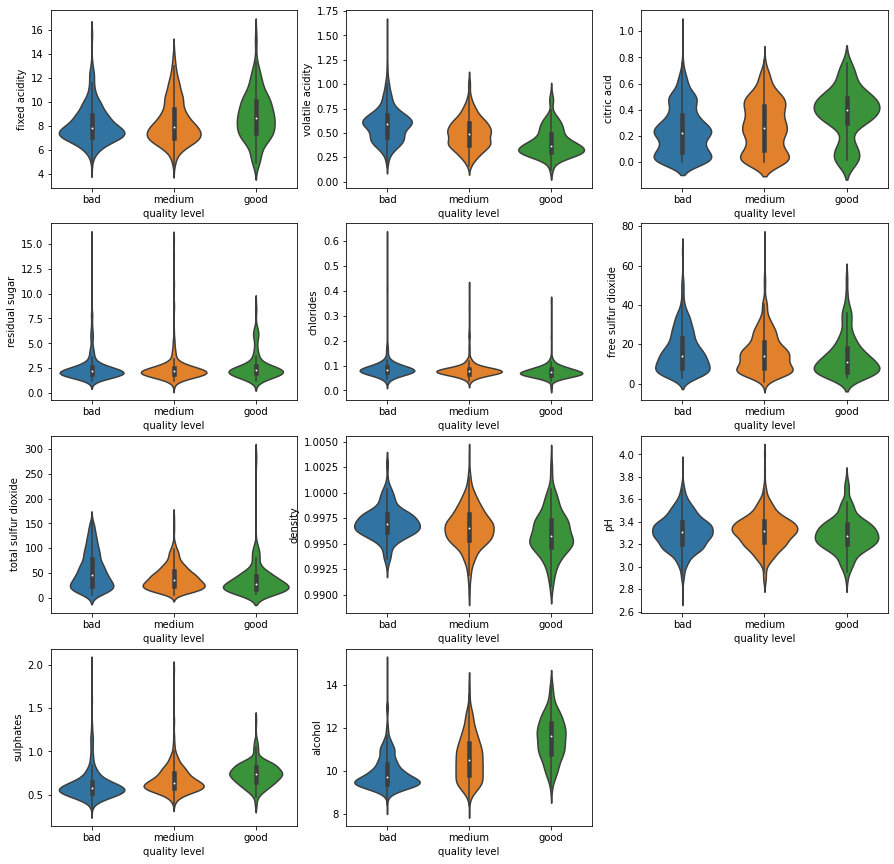

In [12]:
show_attributes_values(red_dataset)

Na podstawie wykresów skrzypcowych pokazujących dystrybucję wartości atrybutów dla win czerwonych z podziałem na wartości atrybutu decyzyjnego można stwierdzić, że im mniejsza wartość atrybutu volatile acidity oraz im większa wartość atrybutu alcohol, tym lepsza jakość wina czerwonego.

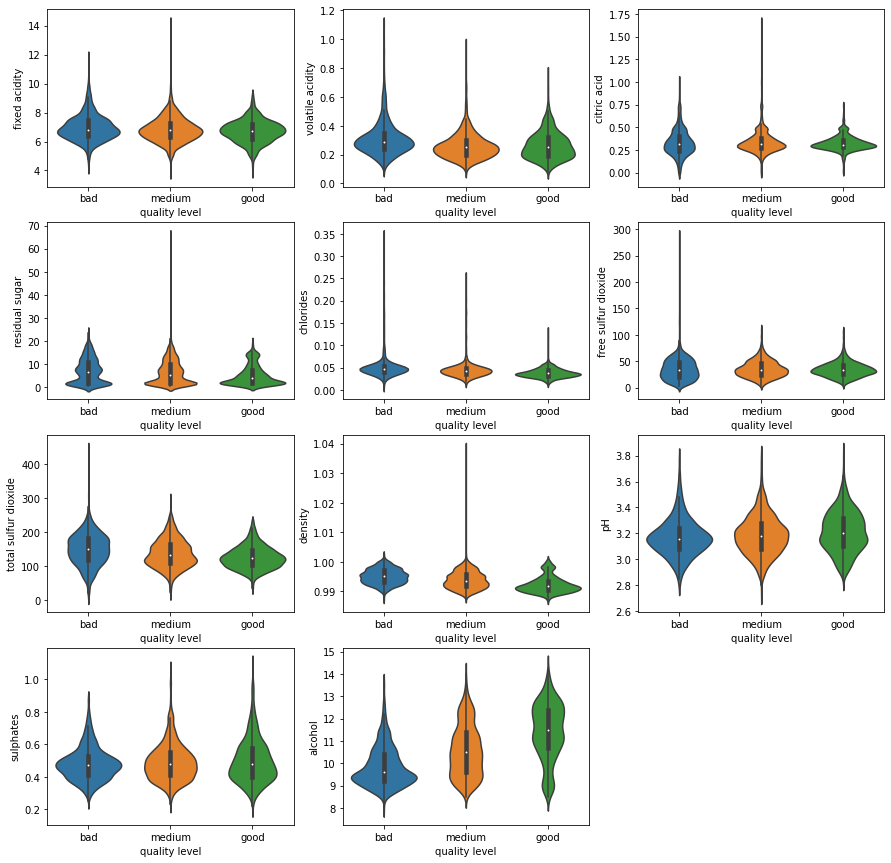

In [13]:
show_attributes_values(white_dataset)

Na podstawie wykresów skrzypcowych pokazujących dystrybucję wartości atrybutów dla win białych z podziałem na wartości atrybutu decyzyjnego można stwierdzić, że im większa wartość atrybutu alcohol, tym lepsza jakość wina białego.

In [14]:
def show_increasing_values(df):
    df_tmp = df.drop(columns = ['quality level'])
    atrybuty = list(df_tmp.columns)
    plt.figure(figsize = (15, 15))
    for index, attribute in enumerate(atrybuty[:-1]):
        plt.subplot(4, 3, index + 1)
        sns.barplot(x='quality', y=attribute, data=df_tmp)

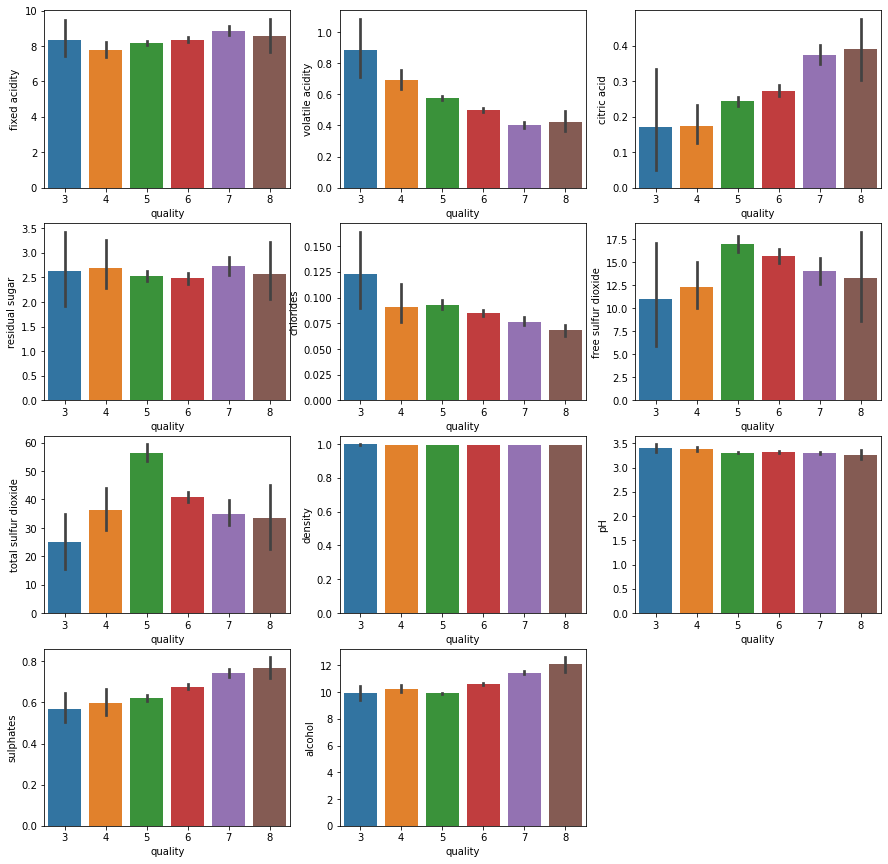

In [15]:
show_increasing_values(red_dataset)

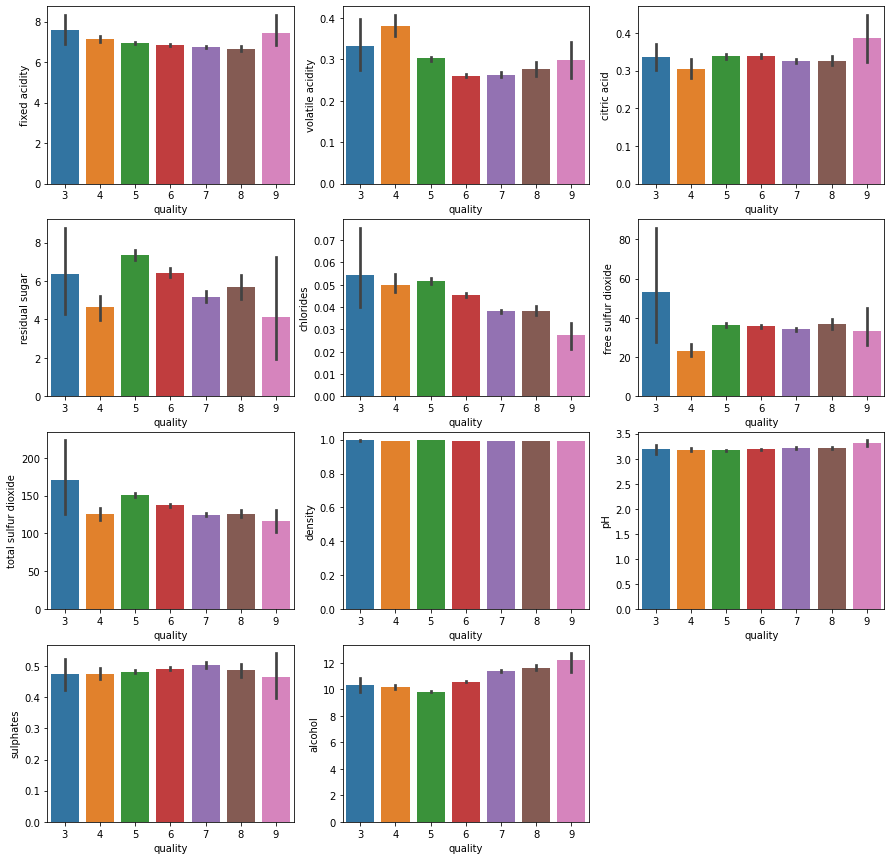

In [17]:
show_increasing_values(white_dataset)

Czerwone wino:


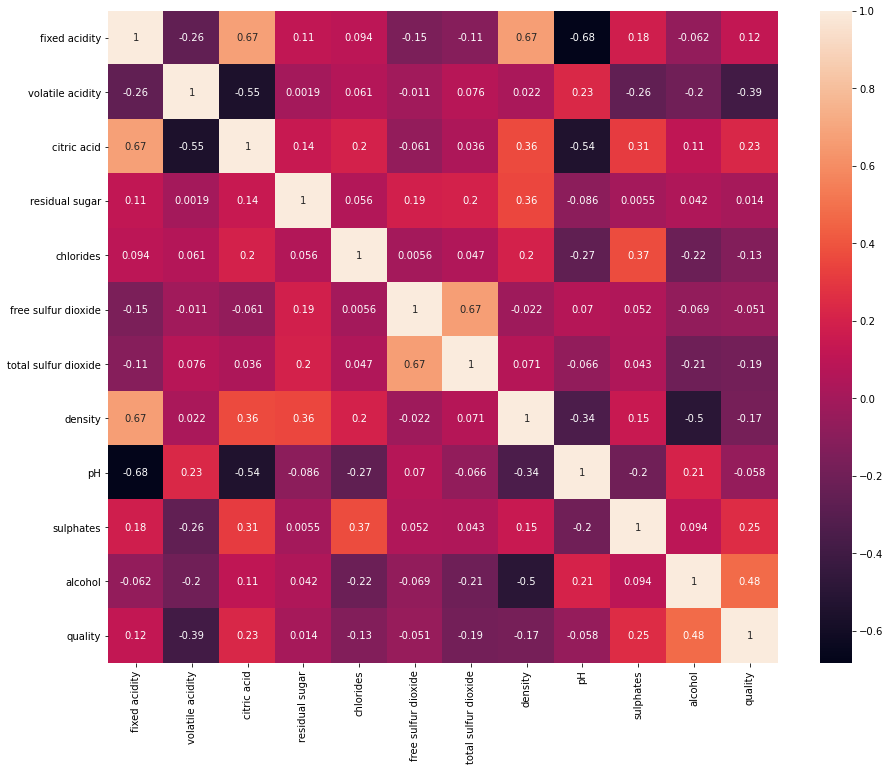



Białe wino:


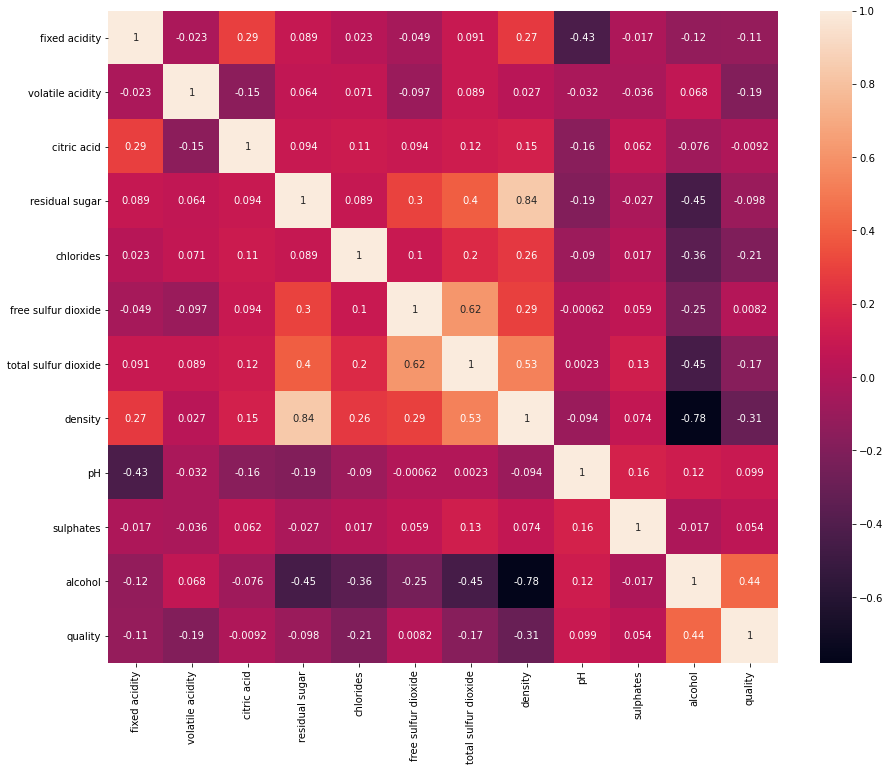

In [16]:
def show_heat_map(df):
    dane_mapa = df.drop(columns='quality level')
    corr = dane_mapa.corr()
    plt.figure(figsize = (15, 12))
    sns.heatmap(corr, annot = corr)
    plt.show()
    
call(show_heat_map)